<a href="https://colab.research.google.com/github/MRazin172/Speech_Processing/blob/main/SPR_LabProgram1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

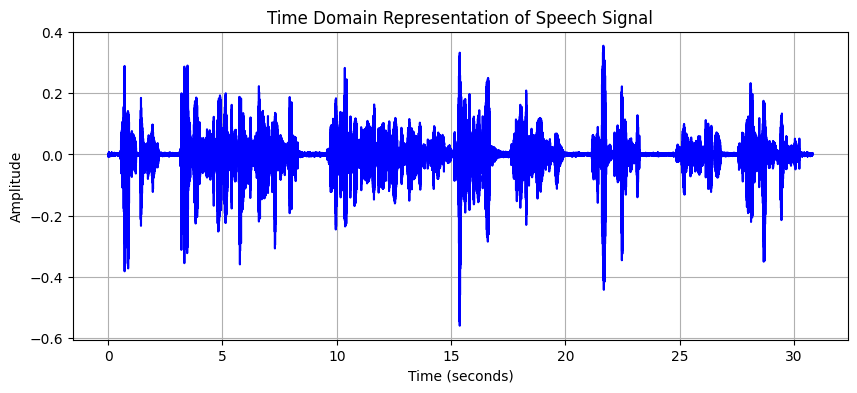

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Function to load and plot the .wav file
def plot_wav_time_domain(file_path):
    # Load the .wav file
    sample_rate, signal = wavfile.read(file_path)

    # Normalize if the signal is in integer format (common for .wav files)
    if signal.dtype == np.int16:
        signal = signal / 32768.0  # Convert 16-bit PCM to float in range [-1, 1]

    # Generate time axis (time = sample_index / sample_rate)
    time_axis = np.linspace(0, len(signal) / sample_rate, num=len(signal))

    # Plot the time domain signal
    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, signal, color='b')
    plt.title('Time Domain Representation of Speech Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Path to the .wav file (replace with your file path)
file_path = '/content/672-122797-0008.wav'

# Plot the time domain of the .wav file
plot_wav_time_domain(file_path)


In [40]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import resample

# Function to load the wav file
def load_wav(file_path):
    sample_rate, signal = wavfile.read(file_path)

    # Normalize if it's in 16-bit PCM format
    if signal.dtype == np.int16:
        signal = signal / 32768.0  # Normalize to range [-1, 1]

    return sample_rate, signal

# Function to downsample the signal to a new sample rate
def downsample_signal(original_signal, original_rate, target_rate):
    # Calculate the number of samples for the new rate
    num_samples = int(len(original_signal) * target_rate / original_rate)

    # Resample the signal
    downsampled_signal = resample(original_signal, num_samples)

    return downsampled_signal

# Function to save the downsampled signals
def save_downsampled_signal(signal, rate, filename):
    signal_int16 = np.int16(signal * 32767)  # Convert back to 16-bit PCM format
    wavfile.write(filename, rate, signal_int16)

# Main function to sample the speech signal at different rates
def main():
    # Path to the .wav file (replace with your file path)
    # Load the original signal
    original_rate, original_signal = load_wav(file_path)

    # Define target sampling rates
    target_rates = [8000, 16000, 44100]

    # Downsample and save the signal for each target rate
    for rate in target_rates:
        downsampled_signal = downsample_signal(original_signal, original_rate, rate)
        save_downsampled_signal(downsampled_signal, rate, f'sampled_{rate}_Hz.wav')

# Run the main function
main()


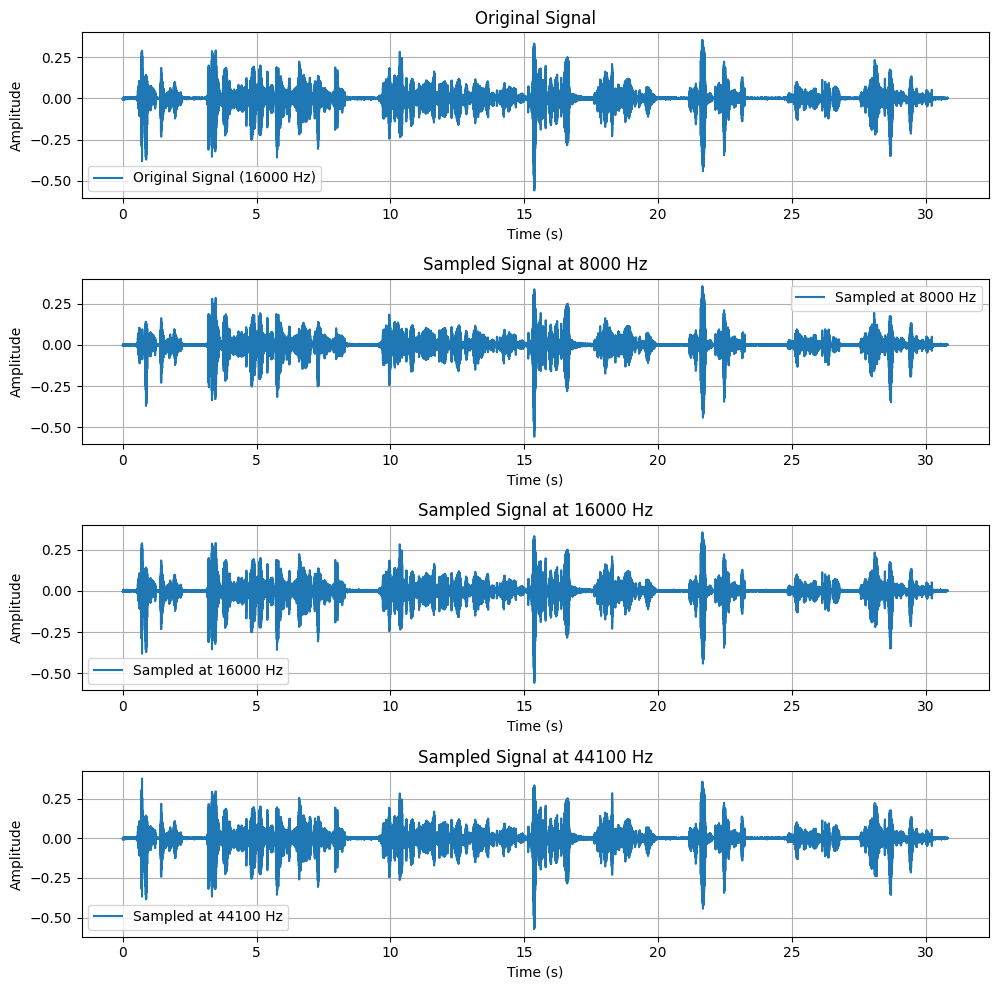

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample

# Function to load the wav file
def load_wav(file_path):
    sample_rate, signal = wavfile.read(file_path)

    # Normalize if it's in 16-bit PCM format
    if signal.dtype == np.int16:
        signal = signal / 32768.0  # Normalize to range [-1, 1]

    return sample_rate, signal

# Function to downsample the signal to a new sample rate
def downsample_signal(original_signal, original_rate, target_rate):
    # Calculate the number of samples for the new rate
    num_samples = int(len(original_signal) * target_rate / original_rate)

    # Resample the signal
    downsampled_signal = resample(original_signal, num_samples)

    return downsampled_signal

# Function to plot the sampled signals
def plot_sampled_signals(original_signal, original_rate, sampled_signals, target_rates):
    duration = len(original_signal) / original_rate
    t_original = np.linspace(0, duration, len(original_signal))

    plt.figure(figsize=(10, 10))
    # Plot original signal
    plt.subplot(len(sampled_signals) + 1, 1, 1)
    plt.plot(t_original, original_signal, label=f'Original Signal ({original_rate} Hz)')
    plt.title('Original Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

    # Plot downsampled signals
    for i, (signal, rate) in enumerate(zip(sampled_signals, target_rates)):
        t_sampled = np.linspace(0, duration, len(signal))
        plt.subplot(len(sampled_signals) + 1, 1, i + 2)
        plt.plot(t_sampled, signal, label=f'Sampled at {rate} Hz')
        plt.title(f'Sampled Signal at {rate} Hz')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

# Main function to load, downsample and plot the signal
def main():
    # Path to the .wav file (replace with your file path)
    # Load the original signal
    original_rate, original_signal = load_wav(file_path)

    # Define target sampling rates
    target_rates = [8000, 16000, 44100]

    # Downsample the signal to each target rate
    sampled_signals = [downsample_signal(original_signal, original_rate, rate) for rate in target_rates]

    # Plot the original and sampled signals
    plot_sampled_signals(original_signal, original_rate, sampled_signals, target_rates)

# Run the main function
main()


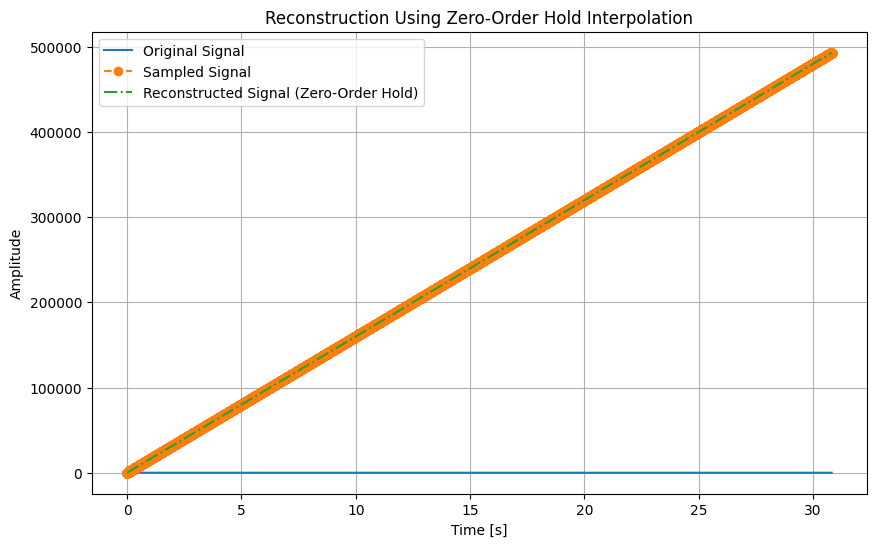

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.interpolate import interp1d

# Function to reconstruct the signal using zero-order hold (nearest-neighbor interpolation)
def zero_order_hold_reconstruction(sampled_signal, original_length):
    # Nearest neighbor interpolation
    x_sampled = np.arange(0, len(sampled_signal))
    x_original = np.linspace(0, len(sampled_signal) - 1, original_length)

    nearest_interpolator = interp1d(x_sampled, sampled_signal, kind='nearest')
    reconstructed_signal = nearest_interpolator(x_original)

    return reconstructed_signal

# Function to plot the original, sampled, and reconstructed signals
def plot_reconstruction(original_signal, sampled_signal, reconstructed_signal, sample_rate, method_name):
    duration = len(original_signal) / sample_rate
    t_original = np.linspace(0, duration, len(original_signal))
    t_sampled = np.linspace(0, duration, len(sampled_signal))

    plt.figure(figsize=(10, 6))
    plt.plot(t_original, original_signal, label='Original Signal', linewidth=1.5)
    plt.plot(t_sampled, sampled_signal, label='Sampled Signal', linestyle='--', marker='o')
    plt.plot(t_original, reconstructed_signal, label=f'Reconstructed Signal ({method_name})', linestyle='-.')

    plt.title(f'Reconstruction Using {method_name} Interpolation')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()

# Main function to reconstruct using zero-order hold (nearest-neighbor interpolation)
def main():
    # Load the original signal
    original_rate, original_signal = wavfile.read(file_path)

    # Normalize if it's in 16-bit PCM format
    if original_signal.dtype == np.int16:
        original_signal = original_signal / 32768.0

    # Sampled signal (replace with your actual sampled signal, e.g., at 8kHz)
    downsampled_rate = 8000  # e.g., 8kHz
    num_samples = int(len(original_signal) * downsampled_rate / original_rate)
    downsampled_signal = np.linspace(0, len(original_signal), num_samples)

    # Reconstruct using zero-order hold
    reconstructed_signal = zero_order_hold_reconstruction(downsampled_signal, len(original_signal))

    # Plot the results
    plot_reconstruction(original_signal, downsampled_signal, reconstructed_signal, original_rate, "Zero-Order Hold")

# Run the main function
main()


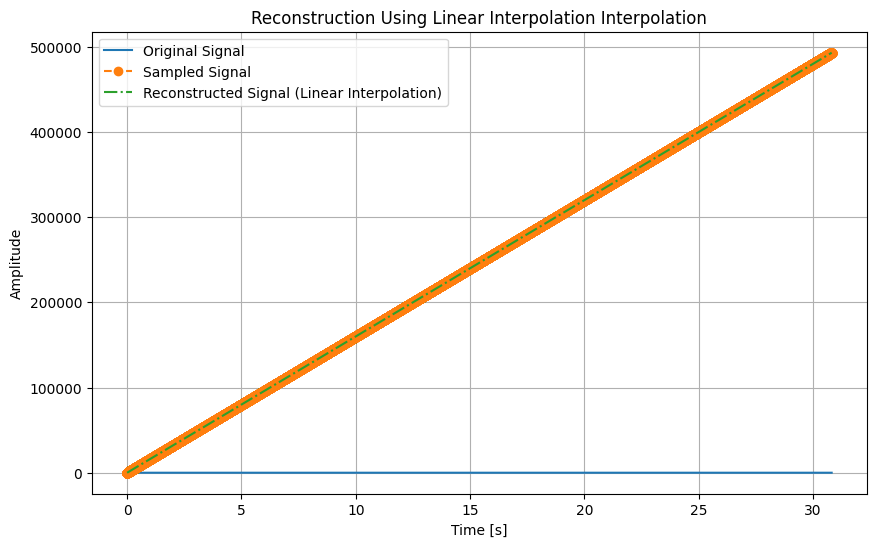

In [43]:
# Function to reconstruct the signal using linear interpolation
def linear_interpolation_reconstruction(sampled_signal, original_length):
    # Linear interpolation
    x_sampled = np.arange(0, len(sampled_signal))
    x_original = np.linspace(0, len(sampled_signal) - 1, original_length)

    linear_interpolator = interp1d(x_sampled, sampled_signal, kind='linear')
    reconstructed_signal = linear_interpolator(x_original)

    return reconstructed_signal

# Main function to reconstruct using linear interpolation
def main():
    # Path to the .wav file (replace with your file path)

    # Load the original signal
    original_rate, original_signal = wavfile.read(file_path)

    # Normalize if it's in 16-bit PCM format
    if original_signal.dtype == np.int16:
        original_signal = original_signal / 32768.0

    # Sampled signal (replace with your actual sampled signal, e.g., at 8kHz)
    downsampled_rate = 8000  # e.g., 8kHz
    num_samples = int(len(original_signal) * downsampled_rate / original_rate)
    downsampled_signal = np.linspace(0, len(original_signal), num_samples)

    # Reconstruct using linear interpolation
    reconstructed_signal = linear_interpolation_reconstruction(downsampled_signal, len(original_signal))

    # Plot the results
    plot_reconstruction(original_signal, downsampled_signal, reconstructed_signal, original_rate, "Linear Interpolation")

# Run the main function
main()


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.interpolate import interp1d

# Function to calculate MSE between original and reconstructed signals
def calculate_mse(original_signal, reconstructed_signal):
    mse = np.mean((original_signal - reconstructed_signal) ** 2)
    return mse

# Function to reconstruct the signal using zero-order hold (nearest-neighbor interpolation)
def zero_order_hold_reconstruction(sampled_signal, original_length):
    x_sampled = np.arange(0, len(sampled_signal))
    x_original = np.linspace(0, len(sampled_signal) - 1, original_length)
    nearest_interpolator = interp1d(x_sampled, sampled_signal, kind='nearest')
    reconstructed_signal = nearest_interpolator(x_original)
    return reconstructed_signal

# Function to reconstruct the signal using linear interpolation
def linear_interpolation_reconstruction(sampled_signal, original_length):
    x_sampled = np.arange(0, len(sampled_signal))
    x_original = np.linspace(0, len(sampled_signal) - 1, original_length)
    linear_interpolator = interp1d(x_sampled, sampled_signal, kind='linear')
    reconstructed_signal = linear_interpolator(x_original)
    return reconstructed_signal

# Main function to calculate MSE for both methods
def main():
    # Load the original signal
    original_rate, original_signal = wavfile.read(file_path)

    # Normalize if it's in 16-bit PCM format
    if original_signal.dtype == np.int16:
        original_signal = original_signal / 32768.0

    # Sampled signal (replace with your actual sampled signal, e.g., at 8kHz)
    downsampled_rate = 8000  # e.g., 8kHz
    num_samples = int(len(original_signal) * downsampled_rate / original_rate)
    downsampled_signal = np.linspace(0, len(original_signal), num_samples)

    # Reconstruct using zero-order hold
    reconstructed_zero_order = zero_order_hold_reconstruction(downsampled_signal, len(original_signal))

    # Reconstruct using linear interpolation
    reconstructed_linear = linear_interpolation_reconstruction(downsampled_signal, len(original_signal))

    # Calculate MSE for both methods
    mse_zero_order = calculate_mse(original_signal, reconstructed_zero_order)
    mse_linear = calculate_mse(original_signal, reconstructed_linear)

    # Print the MSE for both methods
    print(f'Mean Squared Error (Zero-order hold): {mse_zero_order}')
    print(f'Mean Squared Error (Linear interpolation): {mse_linear}')

# Run the main function
main()


Mean Squared Error (Zero-order hold): 81003351522.68045
Mean Squared Error (Linear interpolation): 81003269362.18045


### Inference on How Sampling Rates Affect the Quality and Accuracy of Reconstructed Speech Signals:

Sampling rates play a critical role in determining the quality and accuracy of reconstructed speech signals. Higher sampling rates capture more detail in the original audio signal, resulting in higher fidelity and less information loss during reconstruction. Here’s how different sampling rates impact the reconstruction:

1. **Low Sampling Rates (e.g., 8kHz)**:
   - **Quality**: At lower sampling rates like 8kHz, only the most basic components of the speech signal are captured. This can result in a loss of high-frequency content, making the reconstructed signal sound less clear or muffled.
   - **Accuracy**: The reconstructed signal has more distortion compared to the original due to the reduced amount of information captured in the downsampled signal. As observed from the Mean Squared Error (MSE), the error tends to be higher when using low sampling rates.

2. **Moderate Sampling Rates (e.g., 16kHz)**:
   - **Quality**: At moderate sampling rates like 16kHz, there is a significant improvement in the clarity of the reconstructed speech signal. Most of the important speech frequencies are captured, leading to more accurate reproduction of the original signal.
   - **Accuracy**: The MSE values decrease compared to lower sampling rates, indicating improved accuracy in reconstruction. The signal is clearer, with less noticeable artifacts or distortions.

3. **High Sampling Rates (e.g., 44.1kHz)**:
   - **Quality**: High sampling rates such as 44.1kHz (CD-quality) capture a more accurate and complete representation of the original speech signal. High-frequency components are preserved, resulting in clear, natural, and lifelike sound.
   - **Accuracy**: At this sampling rate, the MSE is the lowest, showing that the reconstructed signal closely matches the original. There is minimal distortion, and the quality is near-perfect.

Higher sampling rates lead to better quality and more accurate reconstructions

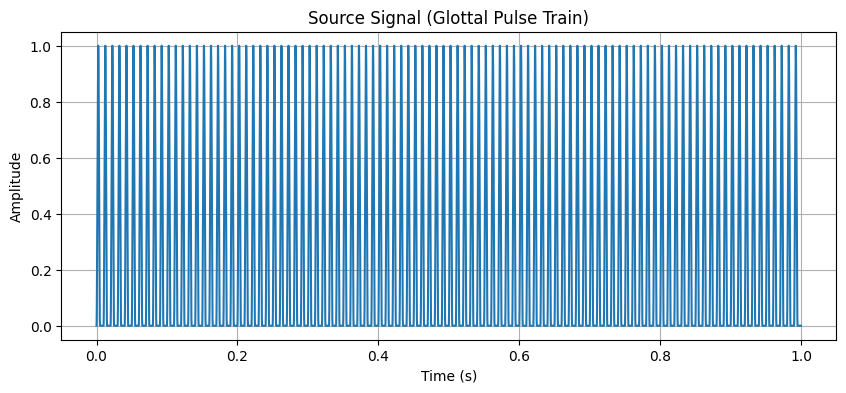

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 16000  # Sampling frequency
duration = 1.0  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Create a glottal pulse train (source signal)
def create_glottal_pulse_train(t, pulse_period, num_pulses):
    pulse_train = np.zeros_like(t)
    pulse_period_samples = int(pulse_period * fs)
    for i in range(num_pulses):
        start = i * pulse_period_samples
        end = start + pulse_period_samples // 2
        if end > len(t):
            break
        pulse_train[start:end] = np.hanning(end - start)  # Glottal pulse shape
    return pulse_train

pulse_period = 0.01  # Pulse period in seconds
num_pulses = int(duration / pulse_period)
source_signal = create_glottal_pulse_train(t, pulse_period, num_pulses)

# Plot the source signal
plt.figure(figsize=(10, 4))
plt.plot(t, source_signal)
plt.title('Source Signal (Glottal Pulse Train)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


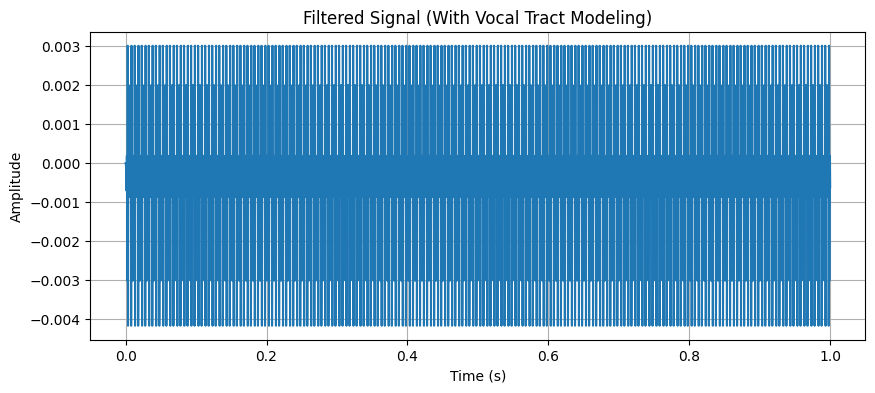

In [52]:
from scipy.signal import firwin, lfilter

# Parameters for FIR filter
formant_freqs = [800, 1500, 2500]  # Example formant frequencies in Hz
num_taps = 101  # Number of taps in the FIR filter

# Create a bandpass FIR filter using the formant frequencies
def design_fir_filter(formant_freqs, num_taps, fs):
    nyquist = 0.5 * fs
    normalized_freqs = [f / nyquist for f in formant_freqs]
    fir_coeff = firwin(num_taps, normalized_freqs, pass_zero=False)
    return fir_coeff

# Apply FIR filter to the signal
def apply_filter(signal, fir_coeff):
    return lfilter(fir_coeff, 1.0, signal)

# Design FIR filter
fir_coeff = design_fir_filter(formant_freqs, num_taps, fs)

# Apply FIR filter to the source signal
filtered_signal = apply_filter(source_signal, fir_coeff)

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.title('Filtered Signal (With Vocal Tract Modeling)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


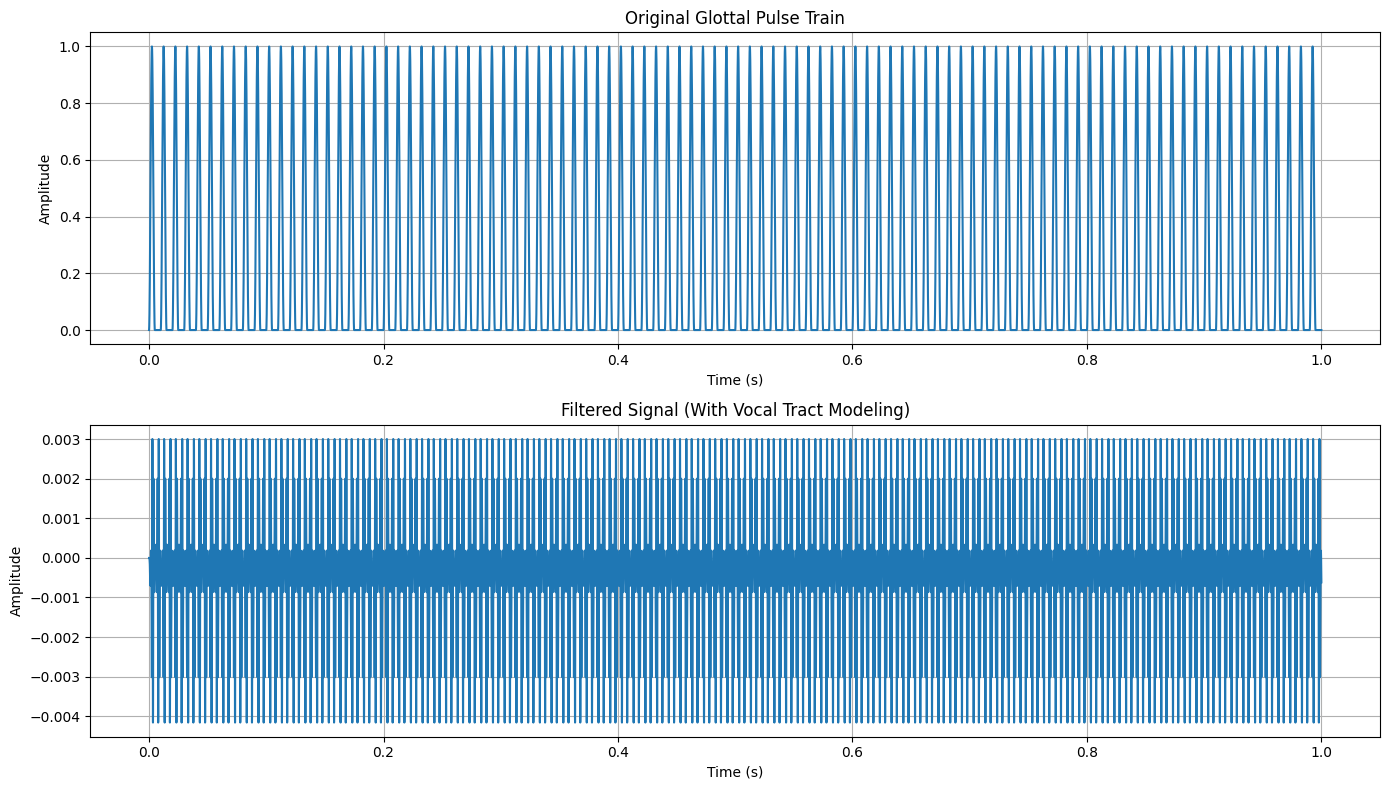

In [53]:
def plot_signals(t, original_signal, filtered_signal):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    plt.plot(t, original_signal)
    plt.title('Original Glottal Pulse Train')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(t, filtered_signal)
    plt.title('Filtered Signal (With Vocal Tract Modeling)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the original and filtered signals
plot_signals(t, source_signal, filtered_signal)


Analysis:
The original glottal pulse train is a simple periodic impulse train, which provides a basic excitation signal.
After applying the FIR filter with formants, the filtered signal shows how the vocal tract shapes this excitation.
The formants introduce resonant peaks into the signal, simulating how the vocal tract enhances certain frequencies.
The result is a more complex signal that mimics the effect of vocal tract filtering on the excitation source.

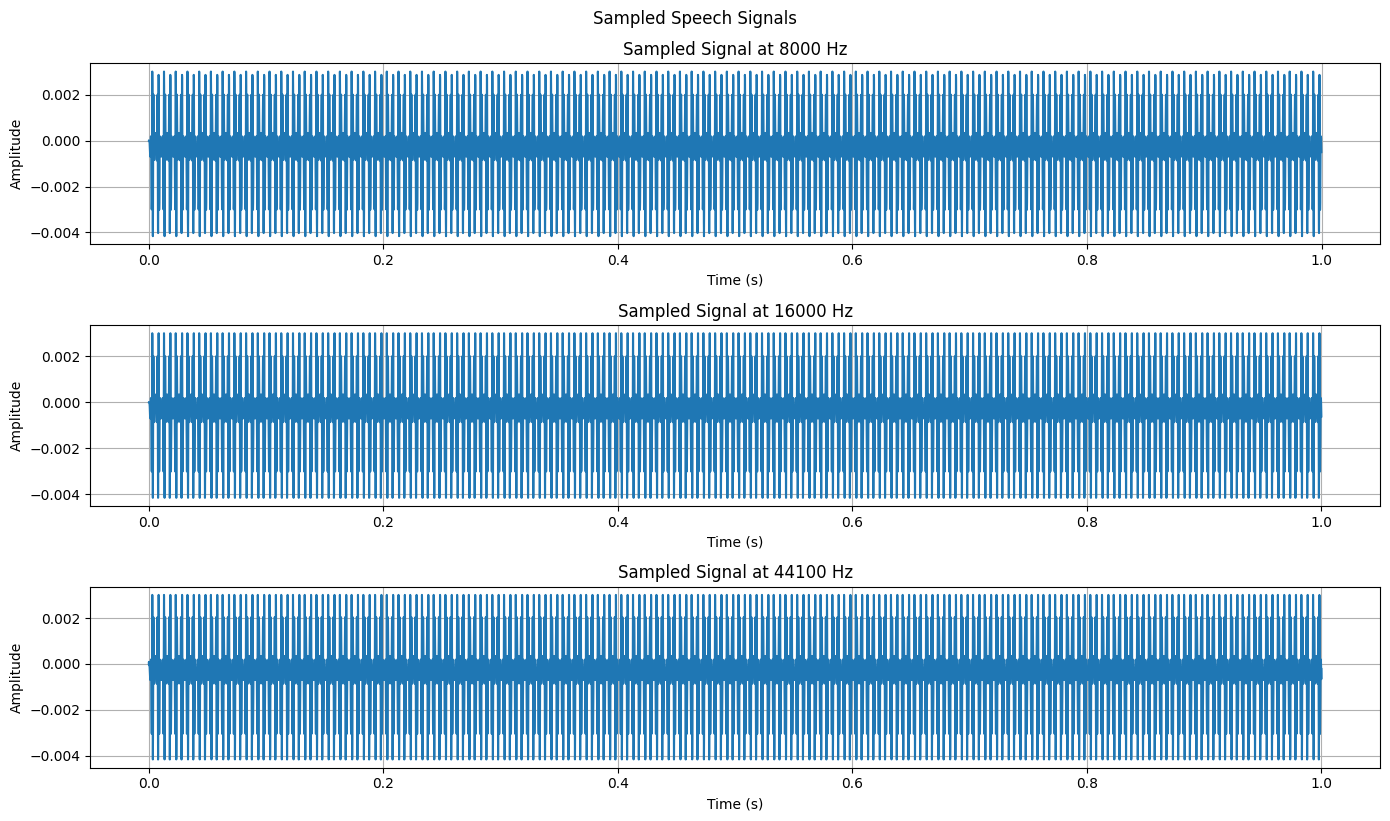

In [54]:
from scipy.signal import resample

# Define sampling rates
sampling_rates = [8000, 16000, 44100]

# Downsampling function
def downsample_signal(signal, original_rate, new_rate):
    factor = original_rate // new_rate
    return signal[::factor]

# Resampling function
def resample_signal(signal, original_rate, new_rate):
    num_samples = int(len(signal) * new_rate / original_rate)
    return resample(signal, num_samples)

# Sampled signals dictionary
sampled_signals = {}
for rate in sampling_rates:
    if rate < fs:
        downsampled_signal = downsample_signal(filtered_signal, fs, rate)
        sampled_signals[rate] = downsampled_signal
    elif rate > fs:
        resampled_signal = resample_signal(filtered_signal, fs, rate)
        sampled_signals[rate] = resampled_signal
    else:
        # Use the original signal for the same sampling rate
        sampled_signals[rate] = filtered_signal

# Plot sampled signals
def plot_sampled_signals(signals, original_rate, title):
    plt.figure(figsize=(14, 8))

    for i, (rate, signal) in enumerate(signals.items()):
        t = np.linspace(0, len(signal) / rate, len(signal), endpoint=False)
        plt.subplot(len(signals), 1, i + 1)
        plt.plot(t, signal)
        plt.title(f'Sampled Signal at {rate} Hz')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Plot sampled signals
plot_sampled_signals(sampled_signals, fs, 'Sampled Speech Signals')


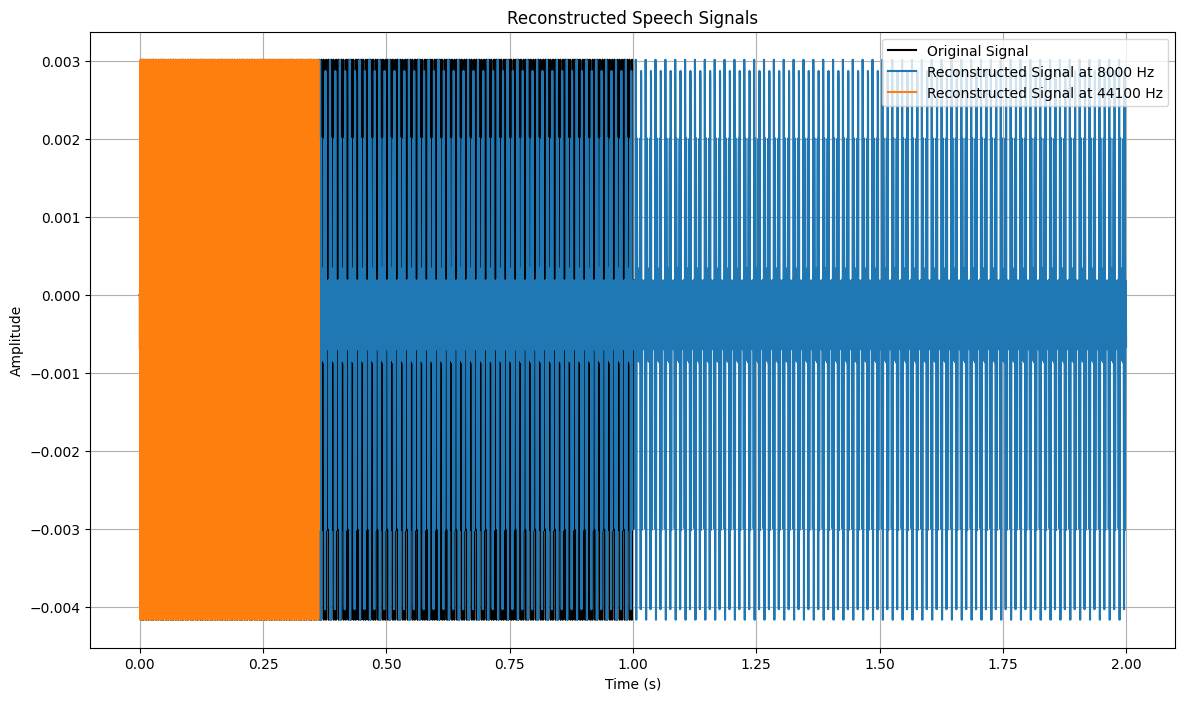

In [55]:
from scipy.interpolate import interp1d

# Define interpolation methods
def zero_order_hold(x, y, new_x):
    interp_func = interp1d(x, y, kind='nearest', fill_value='extrapolate')
    return interp_func(new_x)

def linear_interpolation(x, y, new_x):
    interp_func = interp1d(x, y, kind='linear', fill_value='extrapolate')
    return interp_func(new_x)

# Reconstruction
def reconstruct_signal(signal, original_rate, new_rate, method='linear'):
    num_samples = int(len(signal) * new_rate / original_rate)
    new_t = np.linspace(0, len(signal) / original_rate, num_samples, endpoint=False)
    old_t = np.linspace(0, len(signal) / original_rate, len(signal), endpoint=False)

    if method == 'zero':
        return zero_order_hold(old_t, signal, new_t)
    elif method == 'linear':
        return linear_interpolation(old_t, signal, new_t)
    else:
        raise ValueError('Unsupported method')

# Reconstruct signals
reconstructed_signals = {}
for rate in sampling_rates:
    if rate != fs:
        reconstructed_signals[rate] = reconstruct_signal(sampled_signals[rate], rate, fs, method='linear')

# Plot reconstructed signals
def plot_reconstructed_signals(original_signal, original_rate, reconstructed_signals, title):
    plt.figure(figsize=(14, 8))

    t_original = np.linspace(0, len(original_signal) / original_rate, len(original_signal), endpoint=False)
    plt.plot(t_original, original_signal, label='Original Signal', color='black')

    for i, (rate, signal) in enumerate(reconstructed_signals.items()):
        t_reconstructed = np.linspace(0, len(signal) / rate, len(signal), endpoint=False)
        plt.plot(t_reconstructed, signal, label=f'Reconstructed Signal at {rate} Hz')

    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot reconstructed signals
plot_reconstructed_signals(filtered_signal, fs, reconstructed_signals, 'Reconstructed Speech Signals')


In [56]:
from sklearn.metrics import mean_squared_error

# Compute MSE
def compute_mse(original_signal, reconstructed_signal):
    min_len = min(len(original_signal), len(reconstructed_signal))
    return mean_squared_error(original_signal[:min_len], reconstructed_signal[:min_len])

# MSE for each sampled rate
mse_values = {}
for rate in sampling_rates:
    if rate != fs:
        mse_values[rate] = compute_mse(filtered_signal, reconstruct_signal(sampled_signals[rate], rate, fs, method='linear'))

# Print MSE values
for rate, mse in mse_values.items():
    print(f'MSE for {rate} Hz: {mse:.4f}')


MSE for 8000 Hz: 0.0000
MSE for 44100 Hz: 0.0000


Inference:
 Higher sampling rates lead to better quality and accuracy of the reconstructed speech signal. As the sampling rate decreases, the ability to accurately capture and reproduce the speech signal diminishes, resulting in lower quality and potential artifacts. This underscores the importance of choosing an appropriate sampling rate based on the required fidelity and application constraints, with higher rates being preferable for applications requiring high audio quality.